In [ ]:
import json

with open("/Users/andreypetukhov/Documents/Thesis/LLM-Polymarket/data/polymarket/all_events.json", "r", encoding="utf-8") as f:
    events = json.load(f)

subsample = events[-100:]
    
with open("/Users/andreypetukhov/Documents/Thesis/LLM-Polymarket/data/polymarket/subsample.json", "w", encoding="utf-8") as f:
    json.dump(subsample, f, ensure_ascii=False, indent=4)

print(f"Saved {len(subsample)} events to subsample.json")

In [8]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

file_path = "/Users/andreypetukhov/Documents/Thesis/LLM-Polymarket/data/polymarket/all_events.json"
with open(file_path, "r") as f:
    events = json.load(f)

all_tags = [tag["label"] for event in events for tag in event.get("tags", [])]
tag_counts = Counter(all_tags)
df_tags = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).sort_values(by="Count", ascending=False)

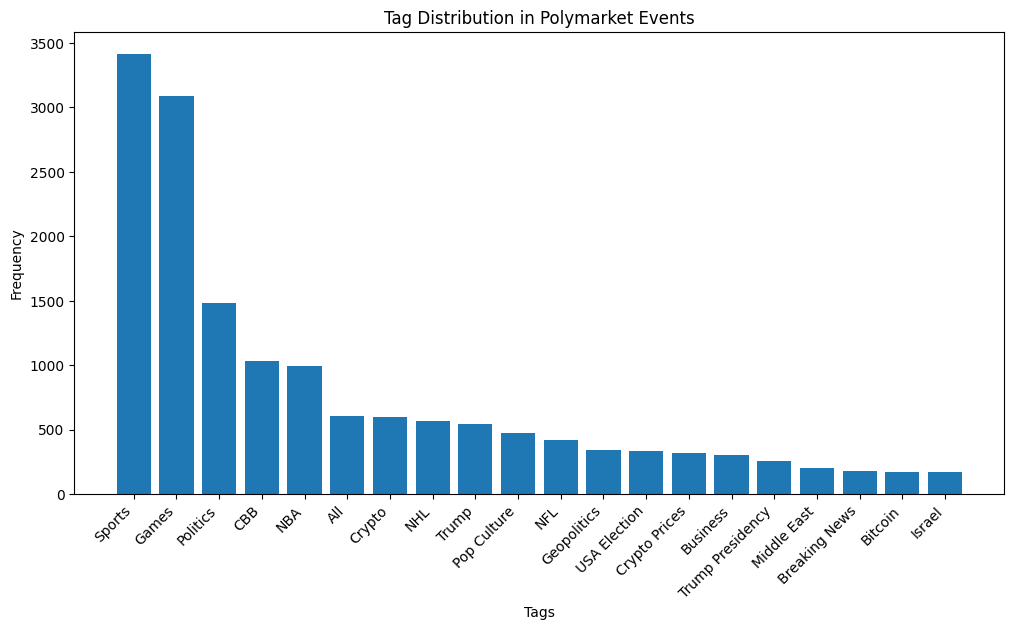

In [7]:
# Строим гистограмму
top_k = 20

plt.figure(figsize=(12, 6))
plt.bar(df_tags["Tag"][:top_k], df_tags["Count"][:top_k])
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.title("Tag Distribution in Polymarket Events")
plt.xticks(rotation=45, ha="right")
plt.show()

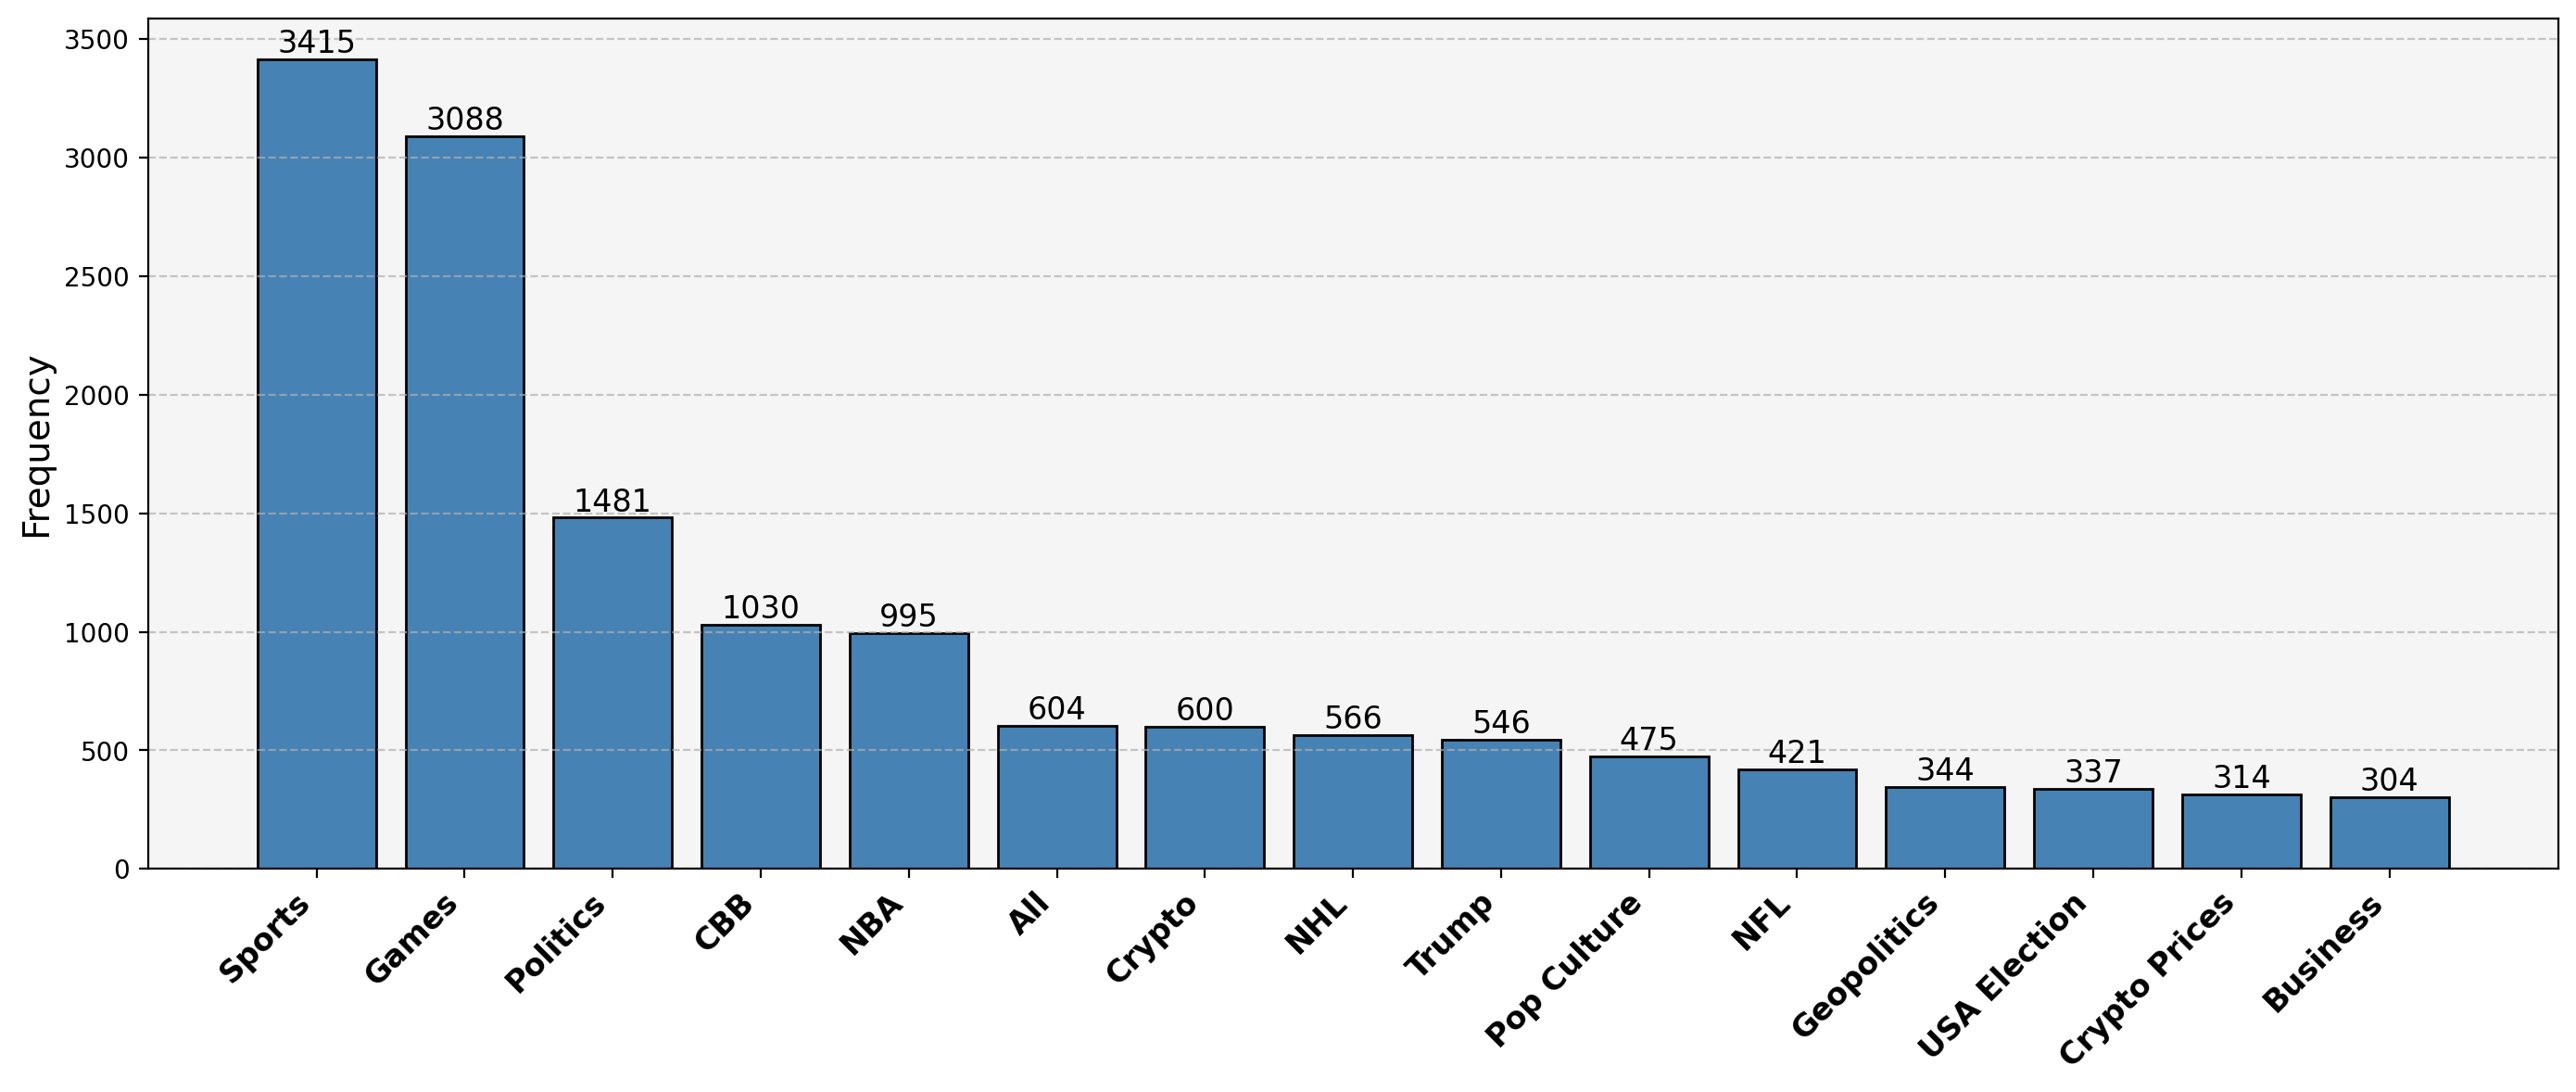

In [12]:
import matplotlib.pyplot as plt
top_k=15

plt.figure(figsize=(14, 6))
bars = plt.bar(df_tags["Tag"][:top_k], df_tags["Count"][:top_k], color="steelblue", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha="center", va="bottom", fontsize=12)

# plt.xlabel("Tag", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# plt.title("Distribution of Polymarket Tags", weight="bold", fontsize=15)

plt.xticks(rotation=45, ha="right", weight="bold", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().set_facecolor("whitesmoke")

plt.tight_layout()
plt.savefig("tag_distribution.png", dpi=300, bbox_inches="tight")
plt.show()